In [1]:
import numpy as np
import pandas as pd
from collections import OrderedDict #sorting participant df dict before pd.concat()
import matplotlib.pylab as plt
%matplotlib inline
#pd.options.display.mpl_style = 'default'
import cPickle as pickle

In [2]:
def col_matches(df, regex):     
    import re    
    cols = list(enumerate(df.columns))  
    matches = [c for (i, c) in cols 
               if re.findall(regex, c)]    
    return matches


def concat_matches(df, *args):
    assert all([len(r) for r in args])
    import re        
    col_match_lists = [col_matches(df, regex) for regex in args]    
    col_set = [df[matches] for matches in col_match_lists]    
    if len(col_set) == 0:
        return None    
    elif len(col_set) == 1:
        return col_set[0]    
    else:
        return pd.concat(col_set, axis=1)

    
def hist_all(df, *args, **kwargs):
    numcols = len(df.columns)
    if numcols > 30:
        yn = raw_input(str(numcols) + " columns. Proceed?")
        if 'n' in yn: return None
    for c in df:
        print(c)
        try:
            plt.hist(df[c])
            plt.show()
        except:
            print("\t(can't histogram this)\n")
            

def scatter_all(df, print_max=None, *args, **kwargs):    
    from itertools import combinations       
    numcols = len(df.columns)
    if numcols > 6:
        yn = raw_input(str(numcols) + " columns. Proceed?")
        if 'n' in yn: return None
    
    combos = combinations(df.columns, 2)
    for c in combos:
        print(c)
        x = df[c[0]]
        y = df[c[1]]        
        dfc = pd.concat([x, y], axis=1)
        xsort = dfc.sort(columns=dfc.columns[0], inplace=False)
        ysort = dfc.sort(columns=dfc.columns[1], inplace=False)        
        try:
            dfc.plot(kind='scatter', x=0, y=1)
            plt.show()
        except:
            print("can't plot")        
        if print_max:
            print(xsort.head(print_max))
            print(ysort.head(print_max))

In [3]:
df = pd.DataFrame.from_csv('RS2_from_spss_1102a.csv')

df.replace('77777', np.nan, inplace=True)
df.replace(77777, np.nan, inplace=True)
df

,SCAL_order_500ms_first,SCAL_sex_femalezero,SCAL_calc_wasivocab_tscore,SCAL_calc_wasimatrix_tscore,SCAL_calc_wasi_tscore_total,SCAL_calc_fsiq2,SCAL_calc_bfi_extraversion,SCAL_calc_bfi_agreeableness,SCAL_calc_bfi_conscientiousness,SCAL_calc_bfi_neuroticism,...,lin_T_DPsd_trunc_log_z_mean1,lin_J_DPsd_trunc_log_z_mean1,mahal_6_means,p_mahal_6_means,mahal_6_means_outlier,margmean_stimtype_single,margmean_stimtype_grouped,margmean_timingtype_iso,margmean_timingtype_phase,margmean_timingtype_linear
pid,,,,,,,,,,,,,,,,,,,,,
15,0,0,49,38,87,89,2.125,3.666667,3.777778,3.125000,...,2.41479863957074,.488496545260892,33.6392207999273,7.89710605930694E-006,1,2.45062501248684,.103663690638599,.236212572256706,2.143573,1.45164759241582
16,1,1,78,53,131,127,4.000,4.111111,2.777778,3.250000,...,-.956139882350332,-.902618789114951,2.24339446220351,.896008294431634,0,-.956508180951858,-.78500194799631,-.645448902472901,-1.037437,-.929379335732641
17,1,1,55,54,109,108,2.750,2.888889,3.555556,3.000000,...,.252346740556394,.711638214236406,1.71921146741239,.943628491922479,0,.0662575348196777,.59473994167723,.291147928532393,0.218356,.4819924773964
18,1,1,50,53,103,102,3.000,4.111111,4.555556,3.000000,...,-.232970866066621,.143215667951748,1.83930695429923,.93386824738905,0,-.116083622371095,.125817273375142,.217271341157432,-0.157793,-.0448775990574368
19,1,1,55,55,110,109,4.500,4.444444,4.000000,1.750000,...,-.344137535143529,.682892642352066,15.5781339636336,.0162066318562994,0,-.775698465456511,.835927016285923,-.453276887738083,0.374242,.169377553604268
20,0,1,57,49,106,105,1.750,4.222222,3.111111,2.625000,...,.826072863176034,.795536455929486,4.37106425113759,.626595714767085,0,.931883236384881,.588333683348445,.840826734745444,0.628694,.81080465955276
21,0,0,53,42,95,95,2.125,3.888889,3.888889,3.875000,...,.157111396760972,-.291339665377024,2.04172391165692,.915821513140055,0,-.00987775723761557,-.407069533136371,.0544826277013487,-0.612789,-.0671141343080258
22,0,0,57,46,103,102,3.250,3.555556,4.444444,3.250000,...,-1.34696863469955,.290112218811589,6.18177543392616,.403138791617383,0,-1.03251044316227,-.189685027020792,-.786980773987168,-0.517884,-.528428207943981
24,1,0,44,55,99,99,2.500,5.000000,3.444444,2.125000,...,-.131413124738908,-.0883182250488547,1.7005888003371,.945075802760578,0,-.306429048145833,.00487689684286133,-.0934068858130599,-0.249056,-.109865674893881


In [4]:
df_mult = df[df.mahal_6_means_outlier == "0"]

In [92]:
#df.s_phase8t_DPm.hist()
covs = concat_matches(df, 'instrumentlevel|fsiq')

dpm = concat_matches(df, 't2_DPm|t_DPm|j_DPm')
logmeans = dpm.applymap(np.abs).applymap(np.log)

pd.concat([covs, logmeans], axis=1).corr()

,SCAL_calc_fsiq2,SCAL_qmusic_instrumentlevel,s_iso5t2_DPm,s_iso8t2_DPm,s_lin5t_DPm,s_lin8t_DPm,s_phase5t_DPm,s_phase8t_DPm,s_iso5j_DPm,s_iso8j_DPm,s_lin5j_DPm,s_lin8j_DPm,s_phase5j_DPm,s_phase8j_DPm
SCAL_calc_fsiq2,1.000000,0.352960,-0.225126,-0.121247,-0.059219,-0.186593,-0.182706,0.005738,0.103423,-0.028989,0.097531,0.025279,0.031406,-0.009130
SCAL_qmusic_instrumentlevel,0.352960,1.000000,-0.299548,-0.247407,-0.310401,-0.395247,-0.406680,-0.209116,-0.213889,-0.135480,-0.169150,-0.112972,-0.236322,-0.178372
s_iso5t2_DPm,-0.225126,-0.299548,1.000000,0.240606,0.372063,0.208959,0.554660,0.287308,0.391591,0.291631,0.358497,0.240362,0.431095,0.335425
s_iso8t2_DPm,-0.121247,-0.247407,0.240606,1.000000,0.574186,0.290153,0.259606,0.380414,0.324889,0.431162,0.435744,0.289016,0.295702,0.406059
s_lin5t_DPm,-0.059219,-0.310401,0.372063,0.574186,1.000000,0.252266,0.368437,0.425255,0.330675,0.445345,0.620027,0.359684,0.375063,0.388789
s_lin8t_DPm,-0.186593,-0.395247,0.208959,0.290153,0.252266,1.000000,0.506525,0.386204,0.231868,0.221870,0.285723,0.205307,0.171472,0.124128
s_phase5t_DPm,-0.182706,-0.406680,0.554660,0.259606,0.368437,0.506525,1.000000,0.333206,0.401023,0.141852,0.330363,0.163587,0.443219,0.155299
s_phase8t_DPm,0.005738,-0.209116,0.287308,0.380414,0.425255,0.386204,0.333206,1.000000,0.218833,0.346467,0.433153,0.246560,0.178326,0.377349
s_iso5j_DPm,0.103423,-0.213889,0.391591,0.324889,0.330675,0.231868,0.401023,0.218833,1.000000,0.388406,0.385640,0.435732,0.584698,0.229653
s_iso8j_DPm,-0.028989,-0.135480,0.291631,0.431162,0.445345,0.221870,0.141852,0.346467,0.388406,1.000000,0.366890,0.367077,0.217356,0.465686


In [5]:
dfcols = lambda r: concat_matches(df, r)

marg_regs = concat_matches(df_mult, 'marg|fsiq2|calc_bfi|instrumentlevel')
list(marg_regs.columns)

['SCAL_calc_fsiq2',
 'SCAL_calc_bfi_extraversion',
 'SCAL_calc_bfi_agreeableness',
 'SCAL_calc_bfi_conscientiousness',
 'SCAL_calc_bfi_neuroticism',
 'SCAL_calc_bfi_openness',
 'SCAL_qmusic_instrumentlevel',
 'margmean_stimtype_single',
 'margmean_stimtype_grouped',
 'margmean_timingtype_iso',
 'margmean_timingtype_phase',
 'margmean_timingtype_linear']

SCAL_calc_fsiq2


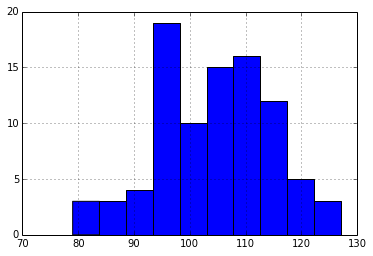

SCAL_calc_bfi_extraversion


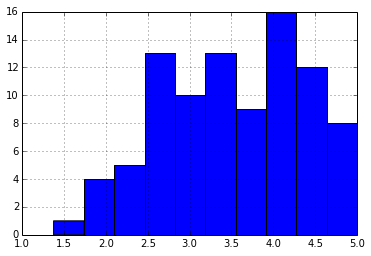

SCAL_calc_bfi_agreeableness


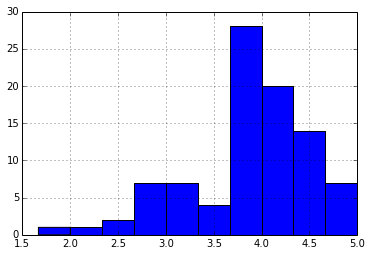

SCAL_calc_bfi_conscientiousness


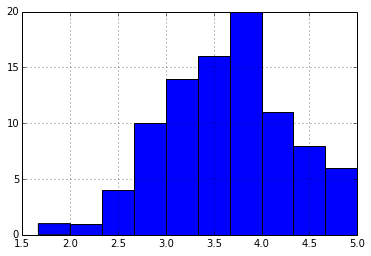

SCAL_calc_bfi_neuroticism


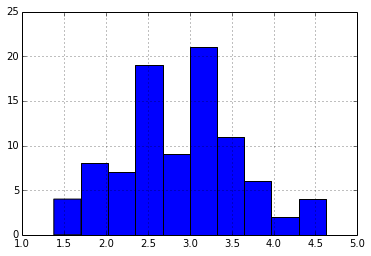

SCAL_calc_bfi_openness


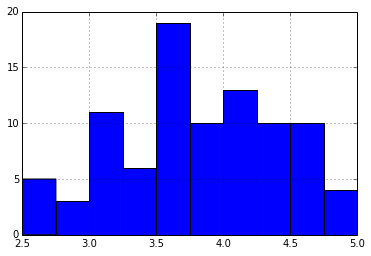

SCAL_qmusic_instrumentlevel


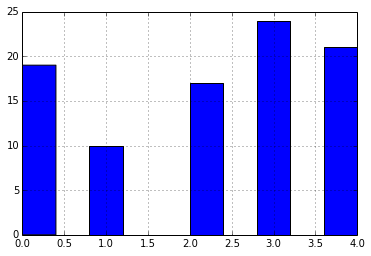

In [45]:
flts = marg_regs.applymap(np.float)


regs_all = concat_matches(df, 'fsiq2|calc_bfi|instrumentlevel')
fltsall = regs_all.applymap(np.float)
#flts.SCAL_calc_bfi_extraversion.hist()

for c in fltsall:
    print(c)
    flts[c].hist()
    plt.show()


In [46]:
list(fltsall)

['SCAL_calc_fsiq2',
 'SCAL_calc_bfi_extraversion',
 'SCAL_calc_bfi_agreeableness',
 'SCAL_calc_bfi_conscientiousness',
 'SCAL_calc_bfi_neuroticism',
 'SCAL_calc_bfi_openness',
 'SCAL_qmusic_instrumentlevel']

In [47]:
#levels = {x: flts[flts.SCAL_qmusic_instrumentlevel==x] for x in [0,1,2,3,4]}
#levels[0].SCAL_calc_fsiq2.hist()

#whis sets whisker length: upper whisker placement = Q3 + whis*IQR, where IQR = interquartile range (Q3-Q1)

fltsall.groupby('SCAL_qmusic_instrumentlevel').count().T

SCAL_qmusic_instrumentlevel,0.0,1.0,2.0,3.0,4.0
SCAL_calc_fsiq2,21,11,17,26,21
SCAL_calc_bfi_extraversion,21,12,17,26,21
SCAL_calc_bfi_agreeableness,21,12,17,26,21
SCAL_calc_bfi_conscientiousness,21,12,17,26,21
SCAL_calc_bfi_neuroticism,21,12,17,26,21
SCAL_calc_bfi_openness,21,12,17,26,21


SCAL_calc_fsiq2


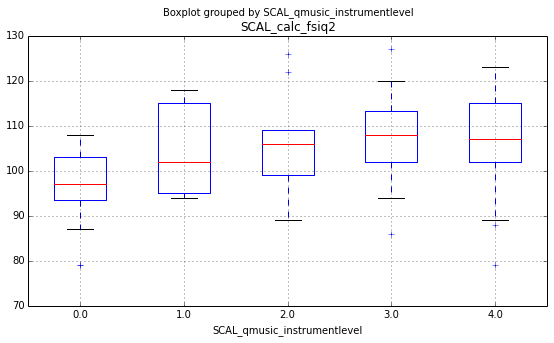

margmean_timingtype_iso


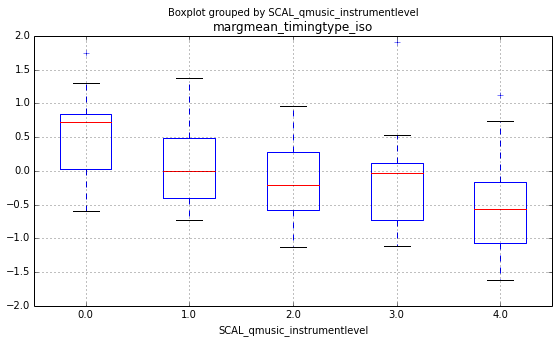

margmean_timingtype_phase


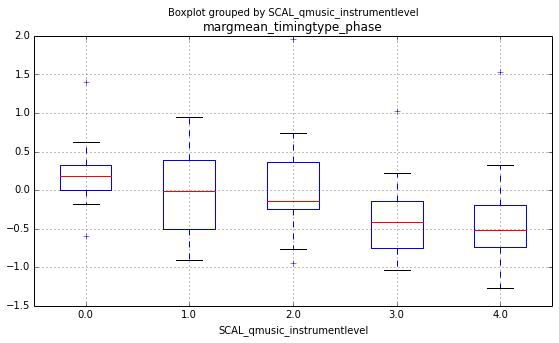

margmean_timingtype_linear


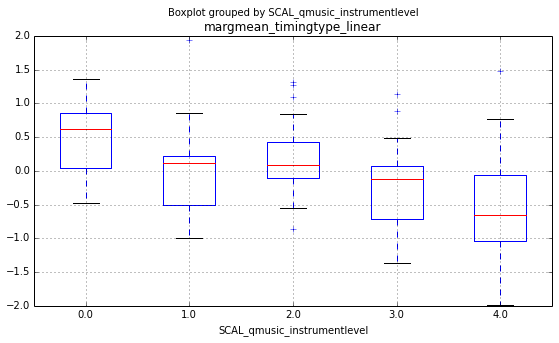

In [49]:
for v in ['SCAL_calc_fsiq2',
          'margmean_timingtype_iso',
          'margmean_timingtype_phase',
          'margmean_timingtype_linear']:
    print(v)
    flts.boxplot(column=v, by='SCAL_qmusic_instrumentlevel',
                 whis=1, 
                 figsize=(9,5), )
    plt.show()

In [38]:
col_matches(df, 'marg')

['margmean_stimtype_single',
 'margmean_stimtype_grouped',
 'margmean_timingtype_iso',
 'margmean_timingtype_phase',
 'margmean_timingtype_linear']

In [39]:
df_comp = concat_matches(df, 'fsiq2|calc_bfi|instrumentlevel|marg')

#from itertools import combinations
#for (x, y) in combinations(df_comp.columns, 2):
#    print (x,y)

df_comp.corr()

,SCAL_calc_fsiq2,SCAL_calc_bfi_extraversion,SCAL_calc_bfi_agreeableness,SCAL_calc_bfi_conscientiousness,SCAL_calc_bfi_neuroticism,SCAL_calc_bfi_openness,SCAL_qmusic_instrumentlevel,margmean_timingtype_phase
SCAL_calc_fsiq2,1.000000,-0.032720,-0.153074,-0.368615,0.084738,0.388978,0.352960,-0.253542
SCAL_calc_bfi_extraversion,-0.032720,1.000000,0.202427,0.196809,-0.423025,-0.009048,-0.036679,0.044203
SCAL_calc_bfi_agreeableness,-0.153074,0.202427,1.000000,0.228410,-0.305756,-0.017481,0.056820,0.096148
SCAL_calc_bfi_conscientiousness,-0.368615,0.196809,0.228410,1.000000,-0.404519,-0.073907,-0.246126,0.280994
SCAL_calc_bfi_neuroticism,0.084738,-0.423025,-0.305756,-0.404519,1.000000,-0.007542,0.022224,-0.171622
SCAL_calc_bfi_openness,0.388978,-0.009048,-0.017481,-0.073907,-0.007542,1.000000,0.308756,-0.279819
SCAL_qmusic_instrumentlevel,0.352960,-0.036679,0.056820,-0.246126,0.022224,0.308756,1.000000,-0.374242
margmean_timingtype_phase,-0.253542,0.044203,0.096148,0.280994,-0.171622,-0.279819,-0.374242,1.000000


In [72]:
tasks = concat_matches(df, '^s.*t_DP.*log$|^s.*t2_DP.*log$|^s.*j_DP.*log$|DPm')

tasks.corr()

,s_iso5t2_DPsd_trunc_log,s_iso8t2_DPsd_trunc_log,s_lin5t_DPsd_trunc_log,s_lin8t_DPsd_trunc_log,s_phase5t_DPsd_trunc_log,s_phase8t_DPsd_trunc_log,s_iso5j_DPsd_trunc_log,s_iso8j_DPsd_trunc_log,s_lin5j_DPsd_trunc_log,s_lin8j_DPsd_trunc_log,...,s_phase5j_DPm,s_phase8j_DPm,s_phase8j_psr_DPm,s_phase8t_psr_DPm,s_phase5j_psr_DPm,s_phase5t_psr_DPm,s_phase5t_nrm_DPm,s_phase8t_nrm_DPm,s_phase5j_nrm_DPm,s_phase8j_nrm_DPm
s_iso5t2_DPsd_trunc_log,1.000000,0.738873,0.672036,0.756945,0.662287,0.662609,0.518349,0.595389,0.455247,0.201396,...,-0.427788,-0.416483,-0.493220,-0.276938,-0.354897,-0.322481,-0.329696,-0.455115,-0.488410,-0.556382
s_iso8t2_DPsd_trunc_log,0.738873,1.000000,0.802354,0.761823,0.604334,0.668939,0.568699,0.624056,0.492997,0.300413,...,-0.257789,-0.391826,-0.315092,-0.225934,-0.144133,-0.212462,-0.278046,-0.370163,-0.212503,-0.436267
s_lin5t_DPsd_trunc_log,0.672036,0.802354,1.000000,0.819063,0.621531,0.683805,0.471432,0.605766,0.578403,0.417489,...,-0.366896,-0.352244,-0.260047,-0.232386,-0.257753,-0.233379,-0.284758,-0.456305,-0.281695,-0.397382
s_lin8t_DPsd_trunc_log,0.756945,0.761823,0.819063,1.000000,0.730477,0.686592,0.592323,0.674277,0.517969,0.412354,...,-0.302963,-0.388918,-0.343525,-0.298387,-0.278940,-0.196580,-0.293536,-0.461500,-0.237192,-0.429664
s_phase5t_DPsd_trunc_log,0.662287,0.604334,0.621531,0.730477,1.000000,0.780417,0.541502,0.497258,0.389583,0.437062,...,-0.255543,-0.165363,-0.322945,-0.119608,-0.225098,-0.122879,-0.269279,-0.311378,-0.267075,-0.346497
s_phase8t_DPsd_trunc_log,0.662609,0.668939,0.683805,0.686592,0.780417,1.000000,0.435621,0.576680,0.398518,0.491541,...,-0.220838,-0.118280,-0.364022,-0.171018,-0.239501,-0.297798,-0.296518,-0.284477,-0.217098,-0.378152
s_iso5j_DPsd_trunc_log,0.518349,0.568699,0.471432,0.592323,0.541502,0.435621,1.000000,0.525210,0.440945,0.394228,...,-0.284170,-0.248068,-0.271728,-0.162725,-0.250636,-0.145251,-0.231012,-0.291565,-0.225744,-0.322471
s_iso8j_DPsd_trunc_log,0.595389,0.624056,0.605766,0.674277,0.497258,0.576680,0.525210,1.000000,0.431951,0.401644,...,-0.185610,-0.311303,-0.316039,-0.273725,-0.088432,-0.181808,-0.202298,-0.411771,-0.205818,-0.457044
s_lin5j_DPsd_trunc_log,0.455247,0.492997,0.578403,0.517969,0.389583,0.398518,0.440945,0.431951,1.000000,0.474816,...,-0.360133,-0.218373,-0.129994,-0.281519,-0.268563,-0.365833,-0.449330,-0.267910,-0.385703,-0.316370
s_lin8j_DPsd_trunc_log,0.201396,0.300413,0.417489,0.412354,0.437062,0.491541,0.394228,0.401644,0.474816,1.000000,...,-0.080230,-0.035010,-0.115116,-0.288476,-0.095215,-0.287127,-0.233761,-0.244360,-0.154673,-0.272354


In [71]:
tasks = concat_matches(df, 'P4_local')

tasks.corr()

,IP4_local_trunc_mz58,I5P4_local_trunc,I8P4_local_trunc,I8P4_localperc_trunc,I5P4_localperc_trunc,I5P4_local_trunc_log,I8P4_local_trunc_log
IP4_local_trunc_mz58,1.000000,-0.901436,-0.890297,-0.890297,-0.901436,-0.874469,-0.873872
I5P4_local_trunc,-0.901436,1.000000,0.605406,0.605406,1.000000,0.982775,0.590171
I8P4_local_trunc,-0.890297,0.605406,1.000000,1.000000,0.605406,0.574182,0.984760
I8P4_localperc_trunc,-0.890297,0.605406,1.000000,1.000000,0.605406,0.574182,0.984760
I5P4_localperc_trunc,-0.901436,1.000000,0.605406,0.605406,1.000000,0.982775,0.590171
I5P4_local_trunc_log,-0.874469,0.982775,0.574182,0.574182,0.982775,1.000000,0.572082
I8P4_local_trunc_log,-0.873872,0.590171,0.984760,0.984760,0.590171,0.572082,1.000000


In [111]:
trunc = concat_matches(df, '^s.*t_DP.*trunc$|^s.*t2_DP.*trunc$|^s.*j_DP.*trunc$')
trunc.max()

s_iso5j_DPsd_trunc       9.760057
s_iso5t2_DPsd_trunc     10.355881
s_iso8j_DPsd_trunc       9.832596
s_iso8t2_DPsd_trunc      9.598785
s_lin5j_DPsd_trunc      11.244313
s_lin5t_DPsd_trunc      10.807008
s_lin8j_DPsd_trunc      12.841810
s_lin8t_DPsd_trunc      10.028023
s_phase5j_DPsd_trunc    19.459099
s_phase5t_DPsd_trunc    16.753541
s_phase8j_DPsd_trunc    25.852135
s_phase8t_DPsd_trunc    25.064911
dtype: float64

In [110]:
trunc.apply(lambda x: x[x==x.max()])

# Total of 9 participants had truncated scores
# Total of 

,s_iso5j_DPsd_trunc,s_iso5t2_DPsd_trunc,s_iso8j_DPsd_trunc,s_iso8t2_DPsd_trunc,s_lin5j_DPsd_trunc,s_lin5t_DPsd_trunc,s_lin8j_DPsd_trunc,s_lin8t_DPsd_trunc,s_phase5j_DPsd_trunc,s_phase5t_DPsd_trunc,s_phase8j_DPsd_trunc,s_phase8t_DPsd_trunc
pid,,,,,,,,,,,,
27,NaN,NaN,NaN,NaN,NaN,NaN,12.055475,NaN,NaN,NaN,NaN,NaN
36,NaN,NaN,NaN,9.542804,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,9.832596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,9.760057,8.176486,NaN,NaN,NaN,NaN,NaN,8.927513,NaN,NaN,NaN,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.459099,NaN,NaN,NaN
104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13.764273,NaN,18.893455
105,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17.629538,NaN
112,NaN,NaN,NaN,NaN,NaN,10.807008,NaN,NaN,NaN,NaN,NaN,NaN
114,NaN,NaN,NaN,NaN,11.244313,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [112]:
trunc.apply(lambda x: x[x==x.max()])

# Total of 9 participants had truncated scores
# Total of 

,s_iso5j_DPsd_trunc,s_iso5t2_DPsd_trunc,s_iso8j_DPsd_trunc,s_iso8t2_DPsd_trunc,s_lin5j_DPsd_trunc,s_lin5t_DPsd_trunc,s_lin8j_DPsd_trunc,s_lin8t_DPsd_trunc,s_phase5j_DPsd_trunc,s_phase5t_DPsd_trunc,s_phase8j_DPsd_trunc,s_phase8t_DPsd_trunc
pid,,,,,,,,,,,,
15,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10.028023,NaN,16.753541,NaN,25.064911
49,9.760057,NaN,NaN,NaN,NaN,NaN,12.84181,10.028023,19.459099,NaN,25.852135,25.064911
55,NaN,10.355881,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16.753541,25.852135,25.064911
64,NaN,NaN,9.832596,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
71,9.760057,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
73,9.760057,10.355881,NaN,9.598785,NaN,NaN,NaN,NaN,19.459099,16.753541,25.852135,NaN
86,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19.459099,NaN,NaN,NaN
89,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,25.852135,25.064911
112,NaN,NaN,NaN,NaN,NaN,10.807008,NaN,NaN,NaN,NaN,NaN,NaN


In [117]:
set(df.index).difference(df_mult.index)

{15, 49, 55, 68, 73, 89}